# FIFA world cup analysis

In [1]:
# Import all the important and necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
data1=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\FIFA WC data\\WorldCupMatches.csv')
data2=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\FIFA WC data\\WorldCupPlayers.csv')
data3=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\FIFA WC data\\WorldCups.csv')

In [3]:
data1.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
data1.shape

(4572, 20)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [6]:
data1.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [7]:
data1['Datetime']=pd.to_datetime(data1['Datetime'])

In [8]:
data1.select_dtypes(include=['object'])

,Stage,Stadium,City,Home Team Name,Away Team Name,Win conditions,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,Group 1,Pocitos,Montevideo,France,Mexico,,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,Group 4,Parque Central,Montevideo,USA,Belgium,,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),USA,BEL
2,Group 2,Parque Central,Montevideo,Yugoslavia,Brazil,,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),YUG,BRA
3,Group 3,Pocitos,Montevideo,Romania,Peru,,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),ROU,PER
4,Group 1,Parque Central,Montevideo,Argentina,France,,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data1.dtypes

Year                           float64
Datetime                datetime64[ns]
Stage                           object
Stadium                         object
City                            object
Home Team Name                  object
Home Team Goals                float64
Away Team Goals                float64
Away Team Name                  object
Win conditions                  object
Attendance                     float64
Half-time Home Goals           float64
Half-time Away Goals           float64
Referee                         object
Assistant 1                     object
Assistant 2                     object
RoundID                        float64
MatchID                        float64
Home Team Initials              object
Away Team Initials              object
dtype: object

In [10]:
data1=data1.astype({'Home Team Name':'string','Away Team Name':'string','Stage':'string','Stage':'string','Stadium':'string','Referee':'string','Assistant 1':'string','Assistant 2':'string','Home Team Initials':'string','Away Team Initials':'string','City':'string','Win conditions':'string'})
data1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  852 non-null    float64       
 1   Datetime              852 non-null    datetime64[ns]
 2   Stage                 852 non-null    string        
 3   Stadium               852 non-null    string        
 4   City                  852 non-null    string        
 5   Home Team Name        852 non-null    string        
 6   Home Team Goals       852 non-null    float64       
 7   Away Team Goals       852 non-null    float64       
 8   Away Team Name        852 non-null    string        
 9   Win conditions        852 non-null    string        
 10  Attendance            850 non-null    float64       
 11  Half-time Home Goals  852 non-null    float64       
 12  Half-time Away Goals  852 non-null    float64       
 13  Referee           

In [11]:
data1

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
4568,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
4569,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
4570,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>


In [12]:
data1.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [13]:
data1.fillna(data1.median(),inplace=True)

In [14]:
data1.isnull().sum()

Year                       0
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals            0
Away Team Goals            0
Away Team Name          3720
Win conditions          3720
Attendance                 0
Half-time Home Goals       0
Half-time Away Goals       0
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                    0
MatchID                    0
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [15]:
data1.dropna(inplace=True)

In [16]:
data1.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [17]:
data1.drop_duplicates()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
832,2014.0,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,2014-07-01 13:00:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI


In [18]:
data1['Total goal']=data1['Home Team Goals']+data1['Away Team Goals']
data1['Full Time Goal']=data1['Half-time Home Goals']+data1['Half-time Away Goals']

In [19]:
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total goal,Full Time Goal
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0,3.0
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0,2.0
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0,2.0
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0,1.0
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0,0.0


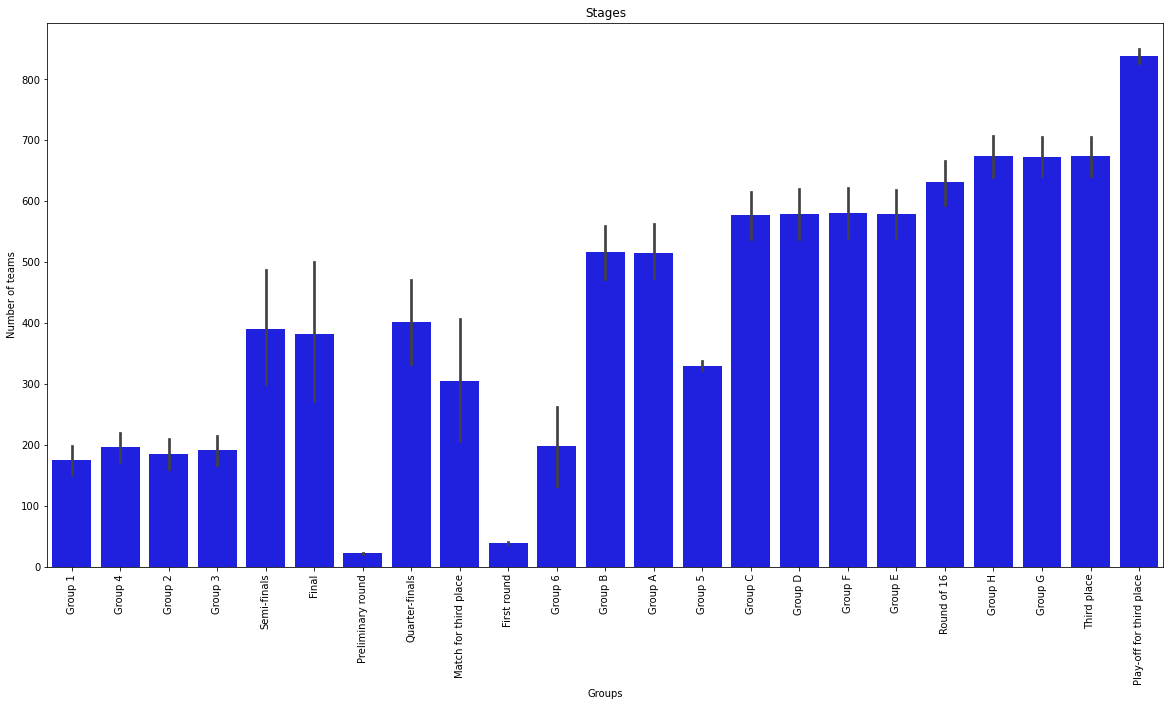

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(data1['Stage'],data1['Stage'].index,color='blue')
plt.title('Stages')
plt.xlabel('Groups')
plt.ylabel('Number of teams')
plt.xticks(rotation=90)
plt.show()


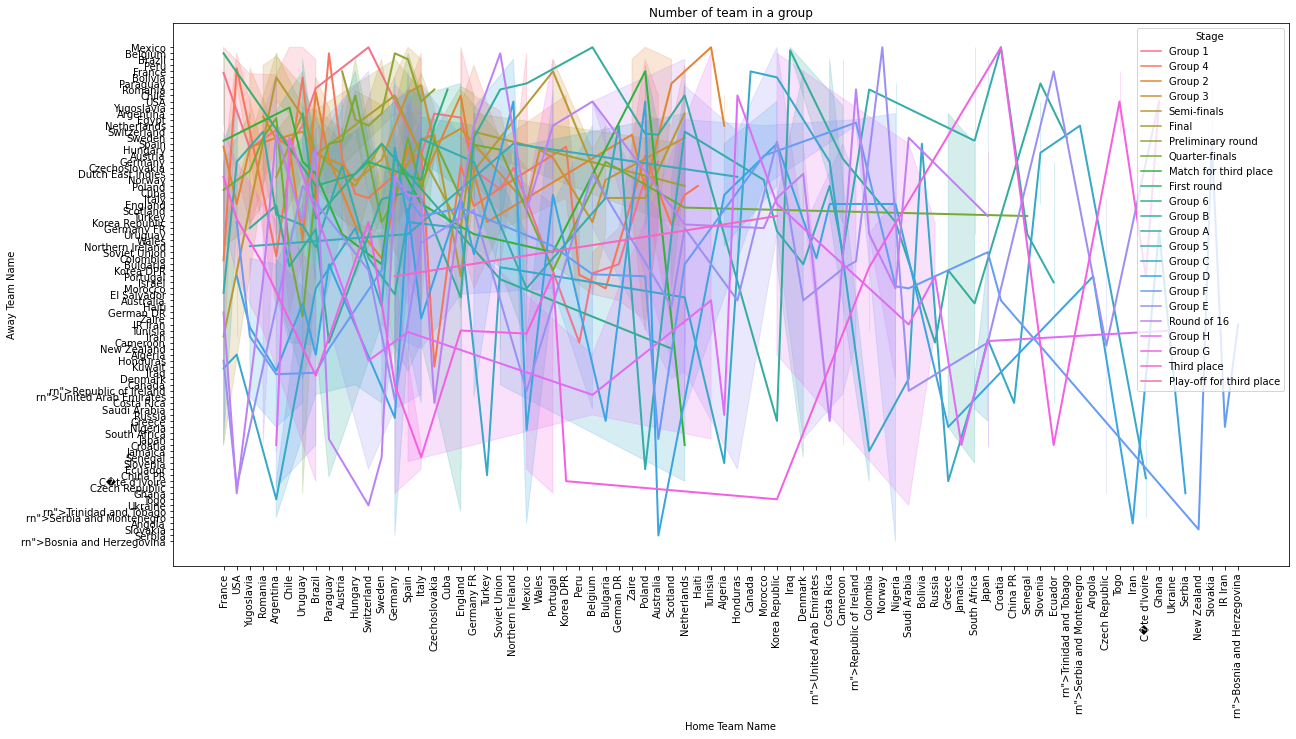

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Home Team Name',y='Away Team Name',data=data1,color='red',linewidth='2',hue='Stage')
plt.title('Number of team in a group')
plt.xlabel('Home Team Name')
plt.ylabel('Away Team Name')
plt.xticks(rotation=90)
plt.show()

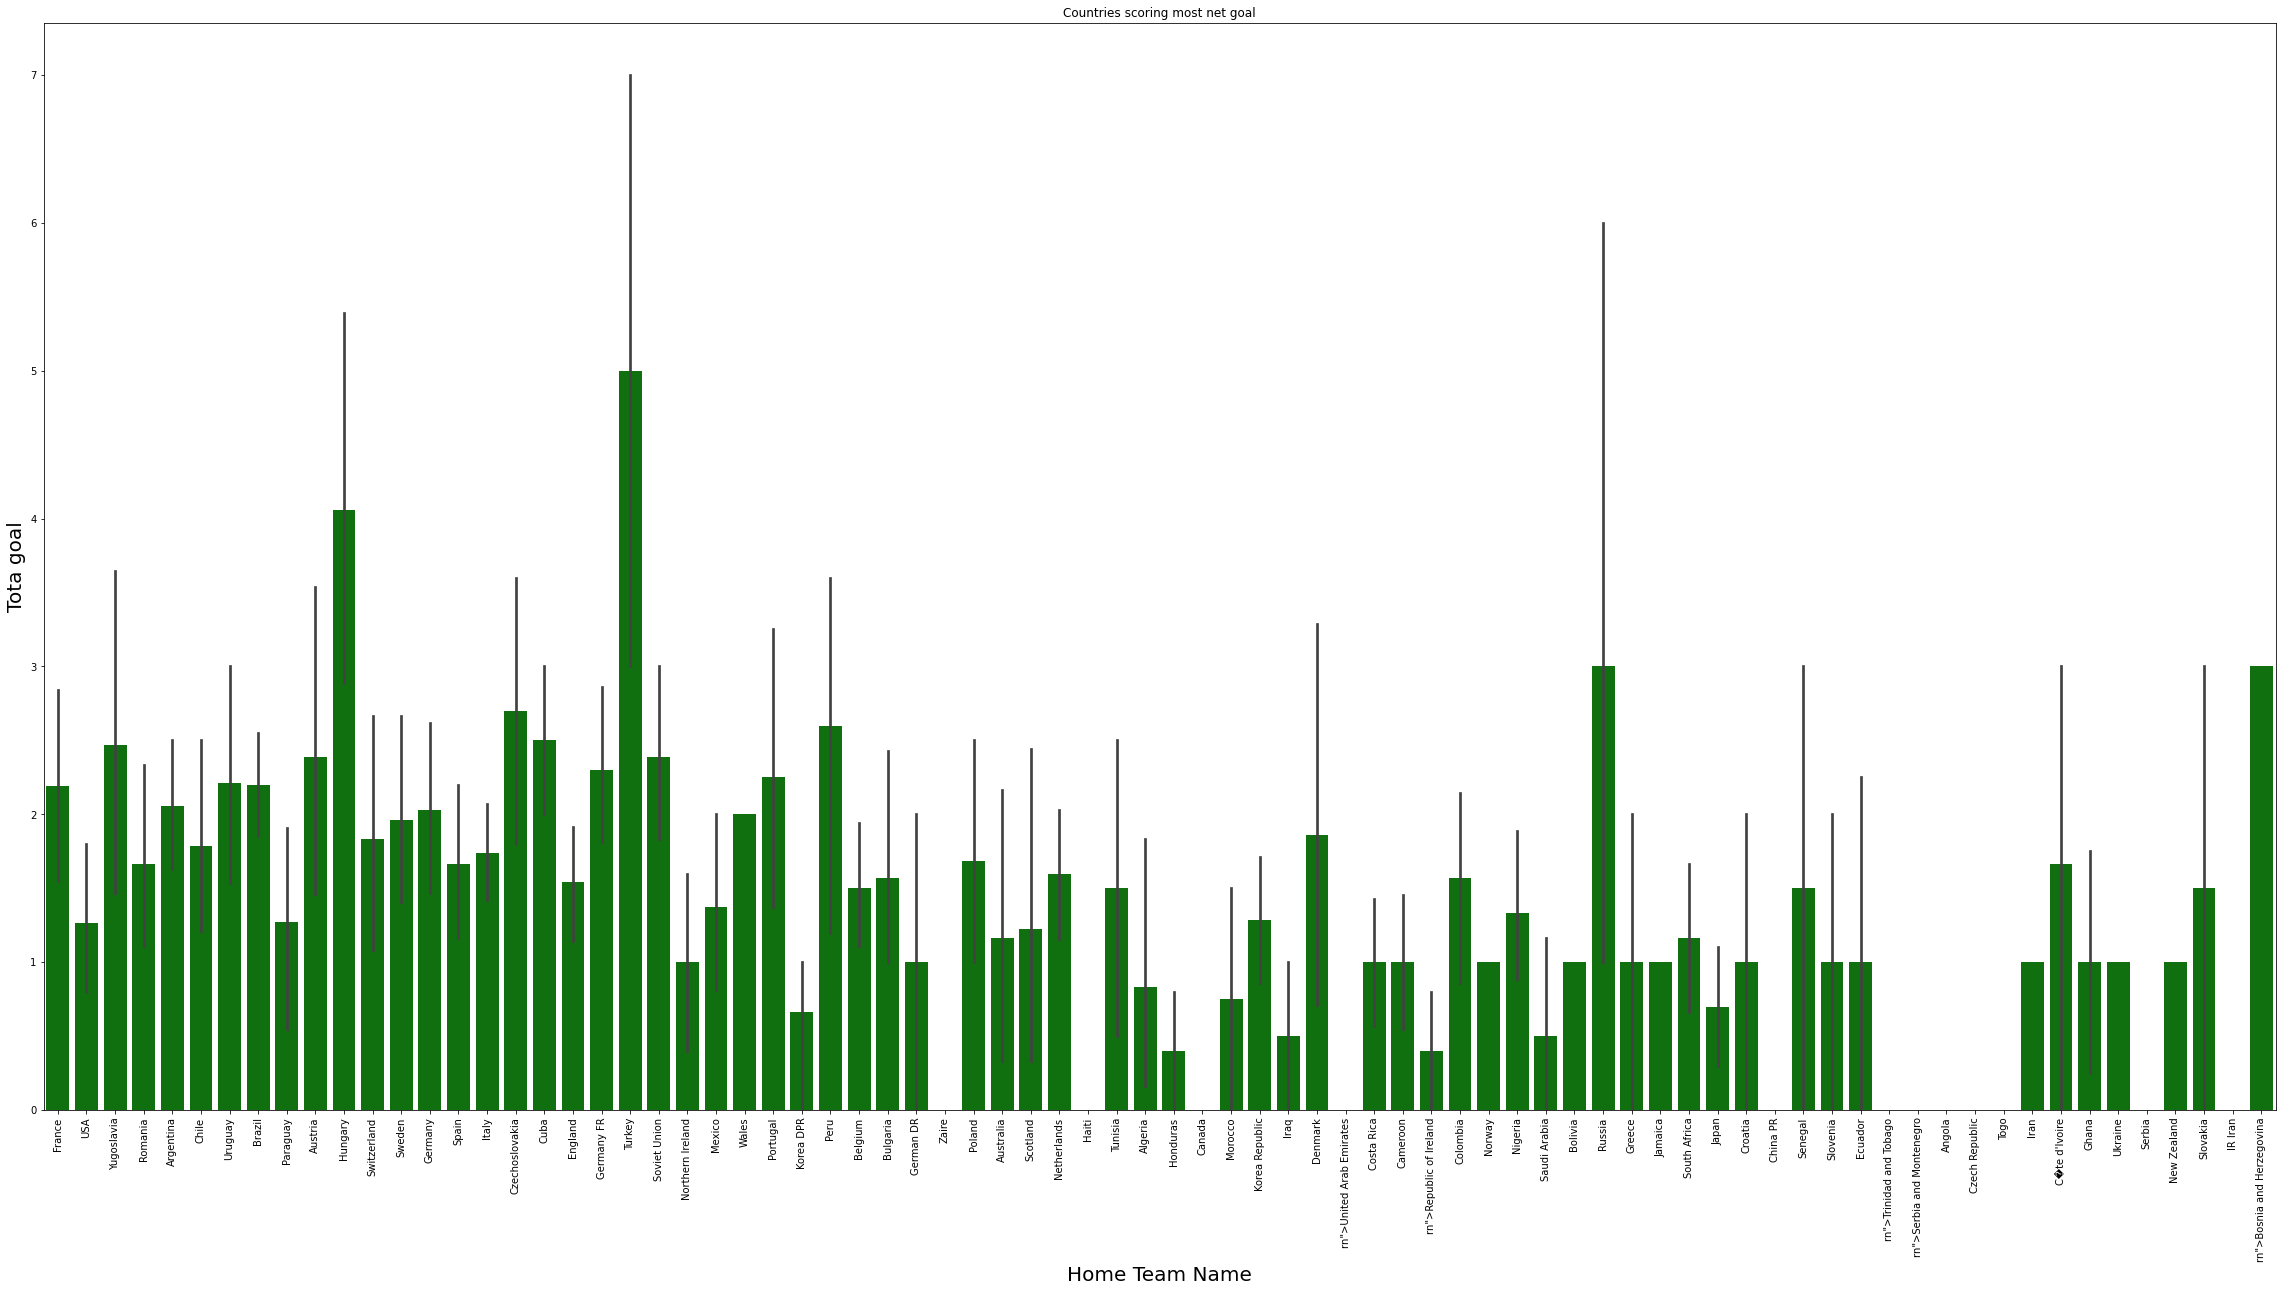

In [22]:
plt.figure(figsize=(40,20))
sns.barplot(data1['Home Team Name'],data1['Home Team Goals'],color='green')
plt.title('Countries scoring most net goal')
plt.xlabel('Home Team Name',fontsize=20)
plt.ylabel('Tota goal',fontsize=20)
plt.xticks(rotation=90)
plt.show()

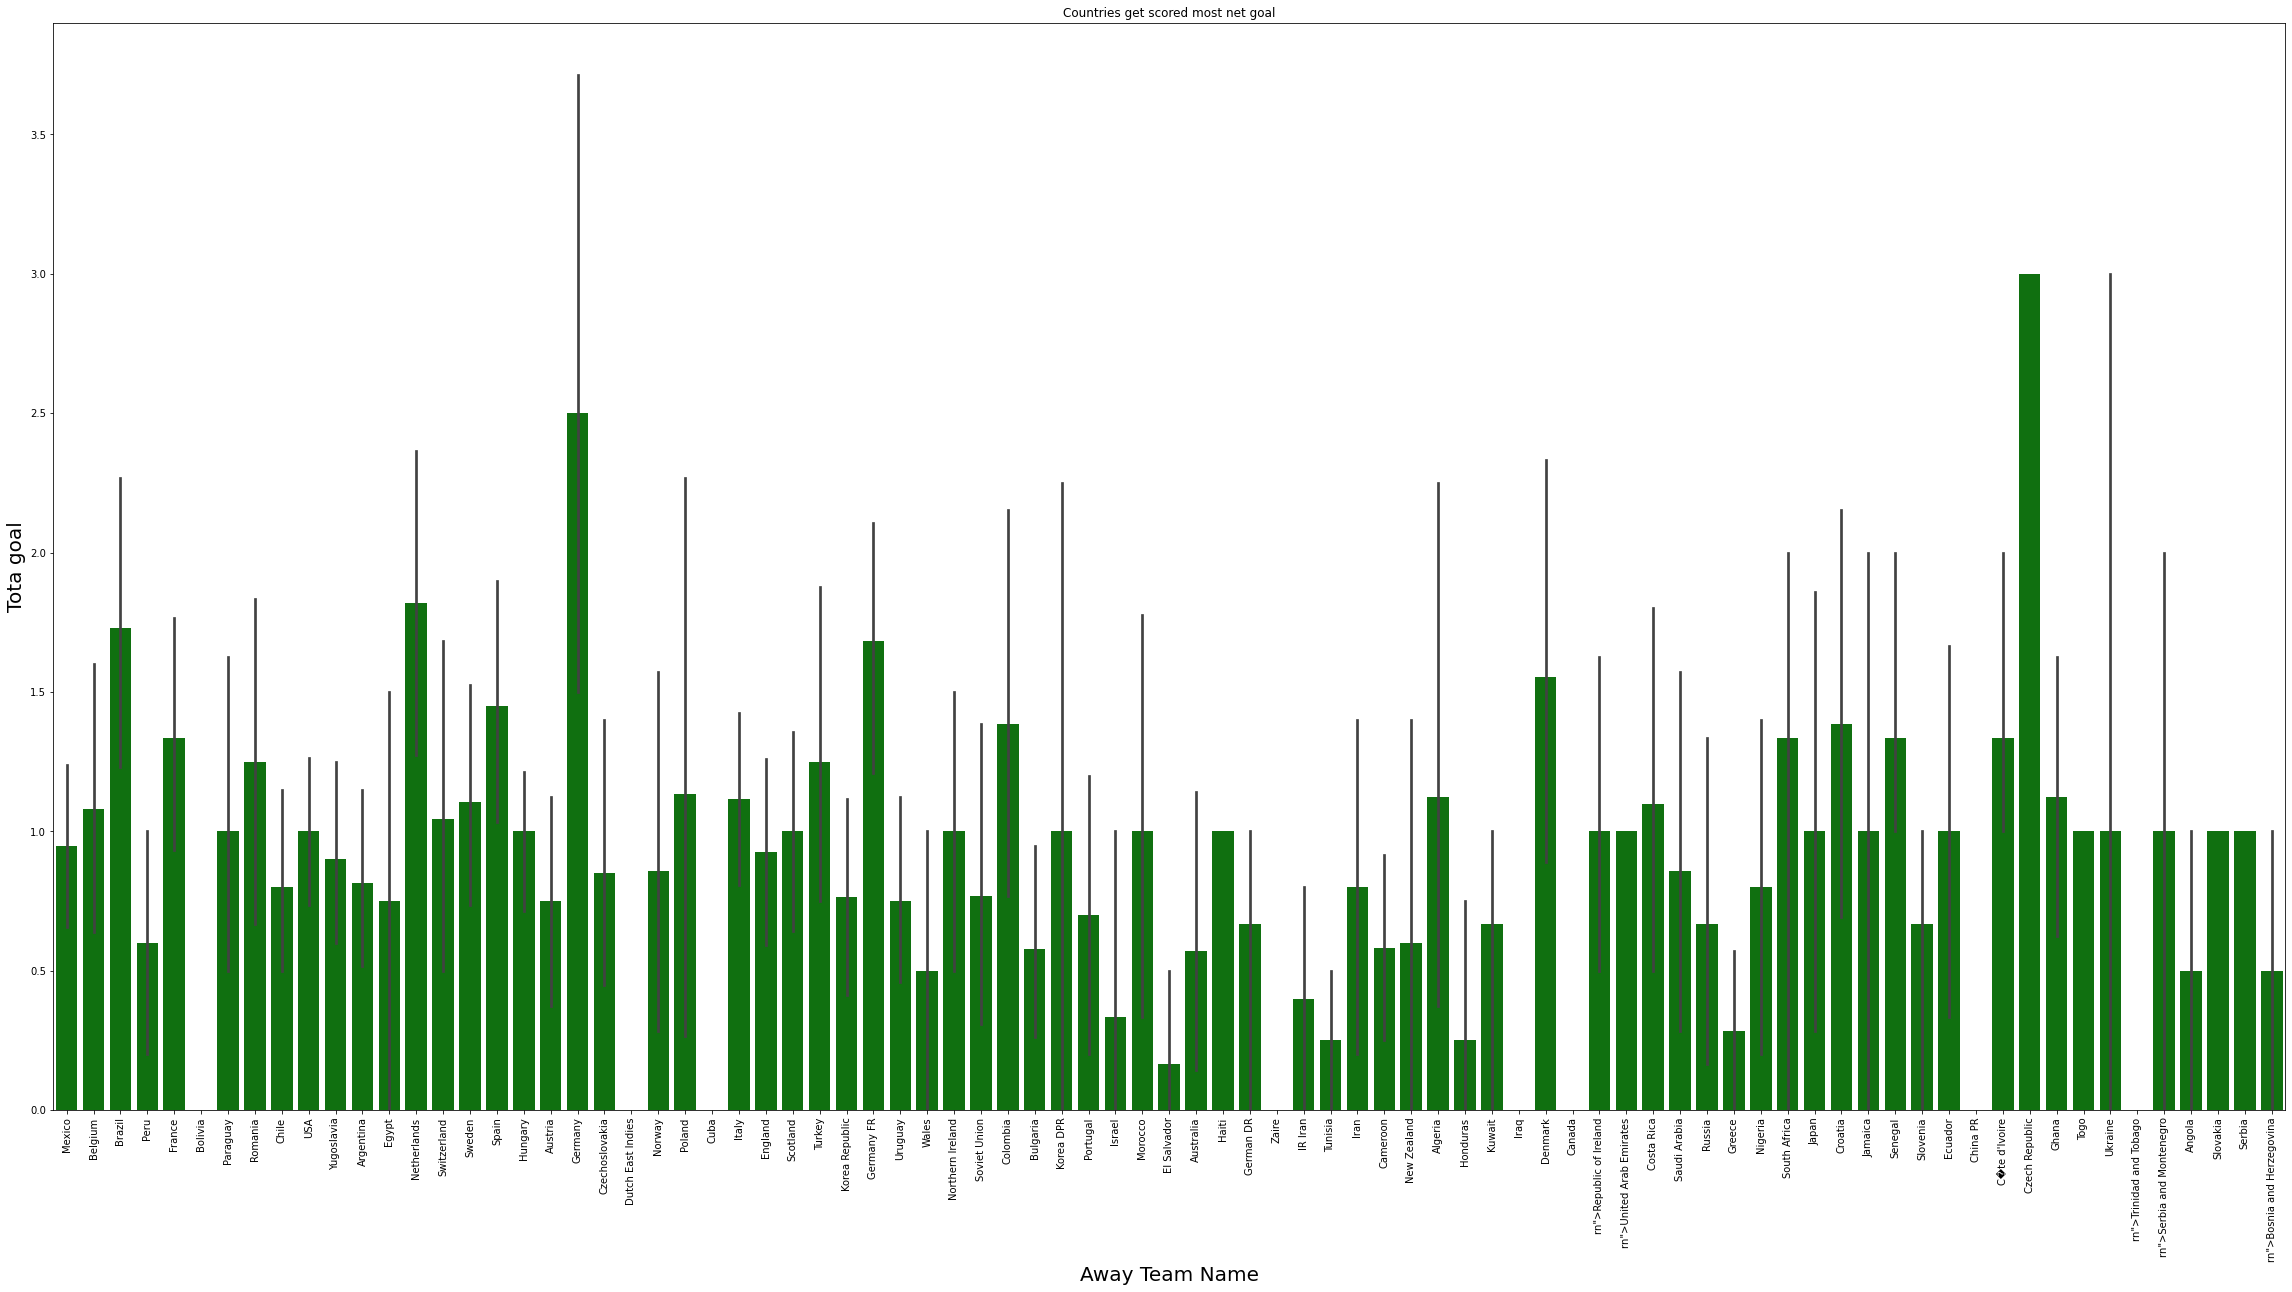

In [23]:
plt.figure(figsize=(40,20))
sns.barplot(data1['Away Team Name'],data1['Away Team Goals'],color='green')
plt.title('Countries get scored most net goal')
plt.xlabel('Away Team Name',fontsize=20)
plt.ylabel('Tota goal',fontsize=20)
plt.xticks(rotation=90)
plt.show()

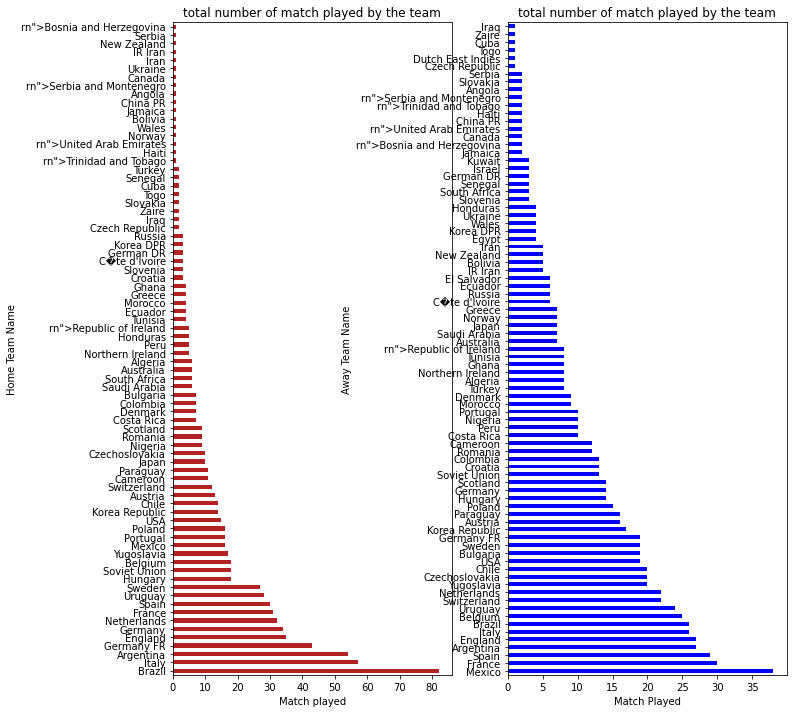

In [24]:
plt.figure(figsize=(11,12))
plt.subplot(1,2,1)
data1['Home Team Name'].value_counts(normalize=False).plot.barh(color='firebrick')
plt.title('total number of match played by the team')
plt.xlabel('Match played')
plt.ylabel('Home Team Name')
plt.subplot(1,2,2)
data1['Away Team Name'].value_counts(normalize=False).plot.barh(color='blue')
plt.title('total number of match played by the team')
plt.xlabel('Match Played')
plt.ylabel('Away Team Name')
plt.show()

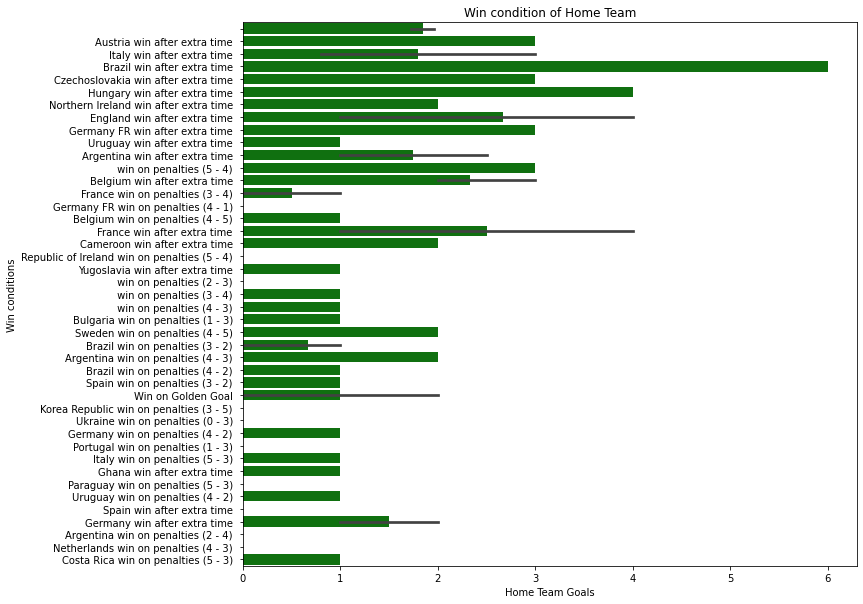

In [25]:
plt.figure(figsize=(11,10))
sns.barplot(data1['Home Team Goals'],data1['Win conditions'],color='green')
plt.title('Win condition of Home Team')
plt.xlabel('Home Team Goals')
plt.ylabel('Win conditions')
plt.show()

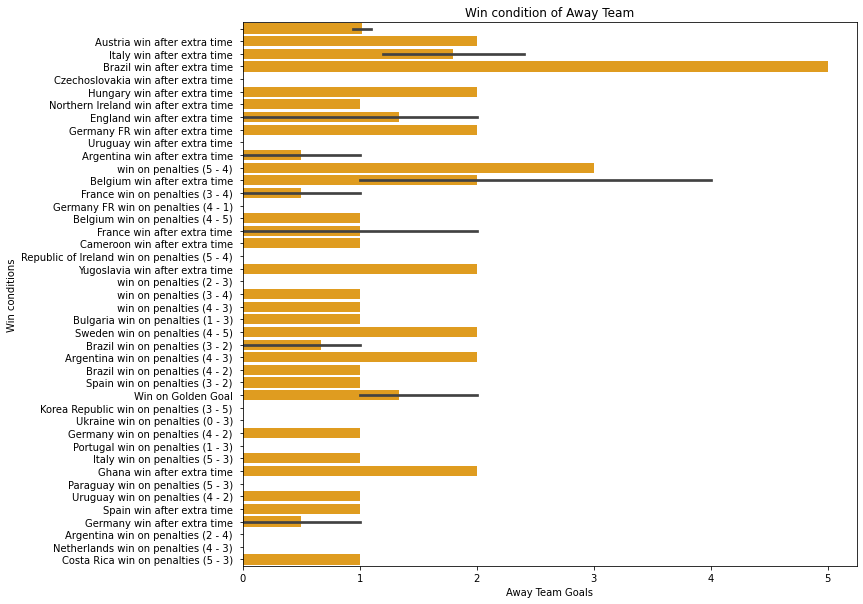

In [26]:
plt.figure(figsize=(11,10))
sns.barplot(data1['Away Team Goals'],data1['Win conditions'],color='orange')
plt.title('Win condition of Away Team')
plt.xlabel('Away Team Goals')
plt.ylabel('Win conditions')
plt.show()

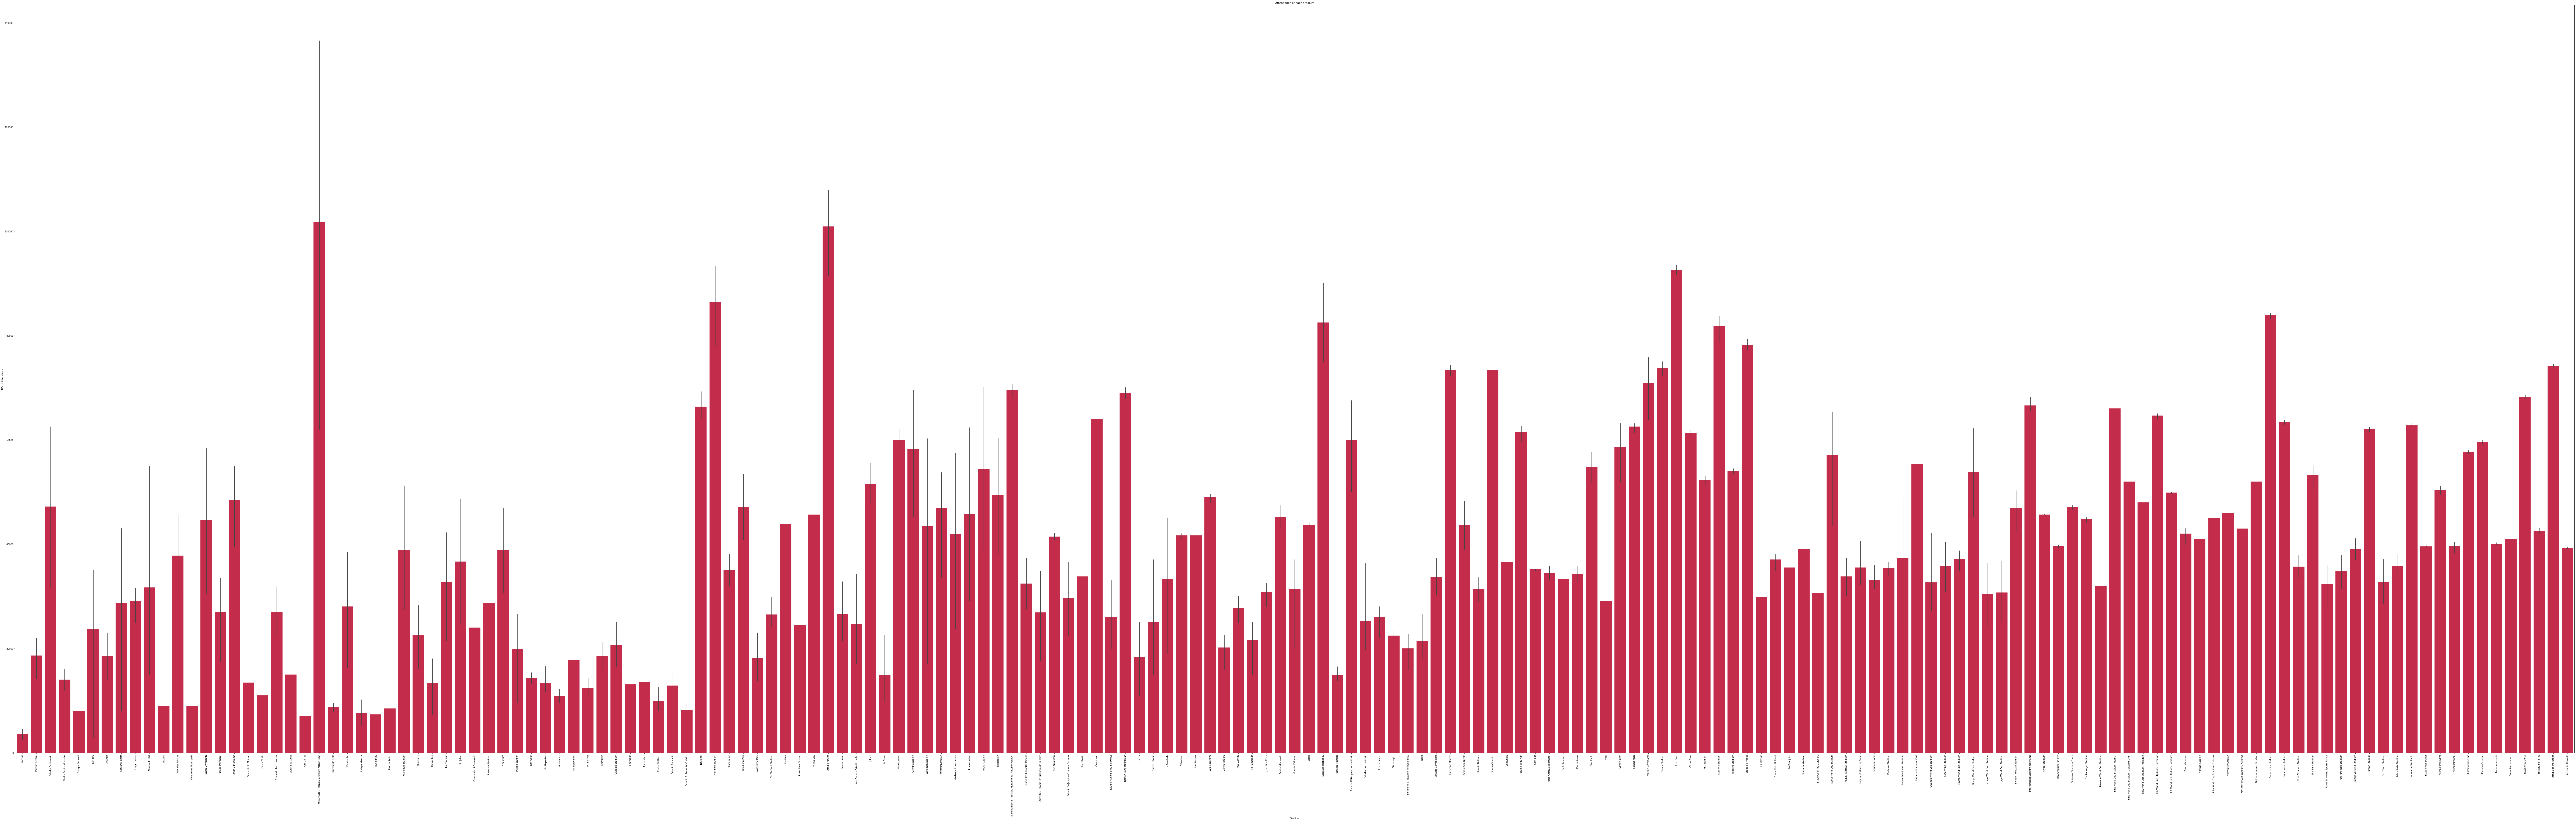

In [27]:
plt.figure(figsize=(200,60))
sns.barplot(data1['Stadium'],data1['Attendance'],color='crimson')
plt.title('Attendance of each stadium')
plt.xlabel('Stadium')
plt.ylabel('NO. of Attendance')
plt.xticks(rotation=90)
plt.show()

In [28]:
data2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [29]:
data2.shape

(37784, 9)

In [30]:
data2.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [31]:
data2.columns

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')

In [32]:
data2.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [33]:
data2.dtypes

RoundID           int64
MatchID           int64
Team Initials    object
Coach Name       object
Line-up          object
Shirt Number      int64
Player Name      object
Position         object
Event            object
dtype: object

In [34]:
data3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [35]:
data3.shape

(20, 10)

In [36]:
data3.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [37]:
data3.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [38]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [39]:
data3.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

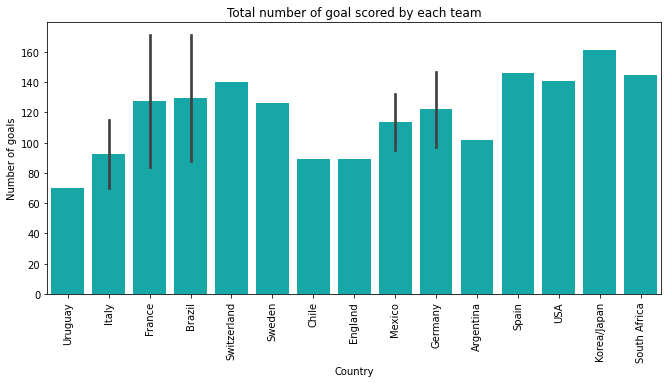

In [40]:
plt.figure(figsize=(11,5))
sns.barplot(data3['Country'],data3['GoalsScored'],color='c')
plt.title('Total number of goal scored by each team')
plt.xlabel('Country')
plt.ylabel('Number of goals')
plt.xticks(rotation=90)
plt.show()

In [41]:
data3.value_counts(data3['Winner'])


Winner
Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
England       1
France        1
Germany       1
Spain         1
dtype: int64

In [42]:
data3.value_counts(data3['Runners-Up'])

Runners-Up
Argentina         3
Germany FR        3
Netherlands       3
Brazil            2
Czechoslovakia    2
Hungary           2
Italy             2
France            1
Germany           1
Sweden            1
dtype: int64

In [43]:
data3.value_counts(data3['Third'])

Third
Germany        3
Brazil         2
France         2
Poland         2
Sweden         2
Austria        1
Chile          1
Croatia        1
Germany FR     1
Italy          1
Netherlands    1
Portugal       1
Turkey         1
USA            1
dtype: int64

In [44]:
data3.value_counts(data3['Fourth'])

Fourth
Uruguay           3
Brazil            2
Yugoslavia        2
Austria           1
Belgium           1
Bulgaria          1
England           1
France            1
Germany FR        1
Italy             1
Korea Republic    1
Netherlands       1
Portugal          1
Soviet Union      1
Spain             1
Sweden            1
dtype: int64

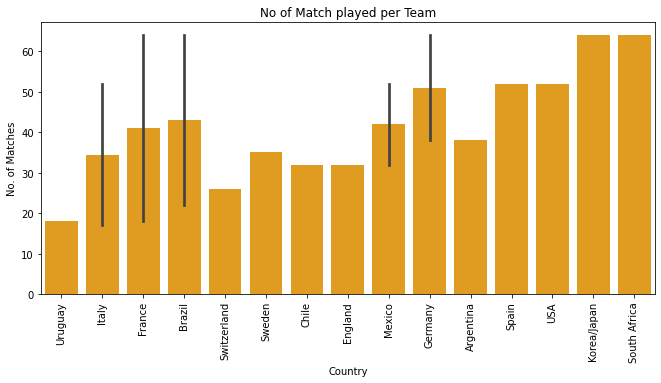

In [45]:
plt.figure(figsize=(11,5))
sns.barplot(data3['Country'],data3['MatchesPlayed'],color='orange')
plt.title('No of Match played per Team')
plt.xlabel('Country')
plt.ylabel('No. of Matches')
plt.xticks(rotation=90)
plt.show()

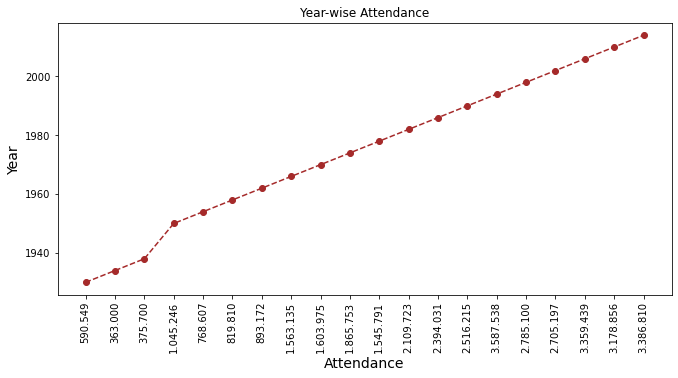

In [46]:
plt.figure(figsize=(11,5))
plt.plot(data3['Attendance'],data3['Year'],'o',color='brown',linestyle='--')
plt.title('Year-wise Attendance')
plt.xlabel('Attendance',fontsize=14)
plt.ylabel('Year',fontsize=14)
plt.xticks(rotation=90)
plt.show()

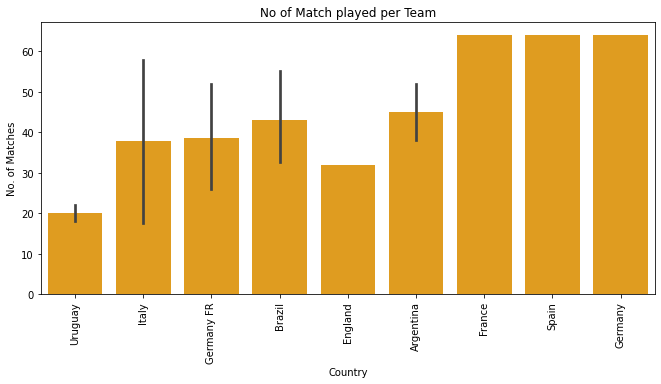

In [47]:
plt.figure(figsize=(11,5))
sns.barplot(data3['Winner'],data3['MatchesPlayed'],color='orange')
plt.title('No of Match played per Team')
plt.xlabel('Country')
plt.ylabel('No. of Matches')
plt.xticks(rotation=90)
plt.show()